<a href="https://colab.research.google.com/github/raffiilham/PVCK_Ganjil_2024/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

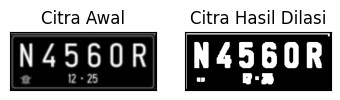

In [3]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD


img_d= cv2.imread('/content/drive/MyDrive/PCVK/images/platnomor.png',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


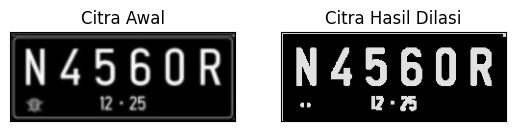

In [4]:
img = cv2.imread('/content/drive/MyDrive/PCVK/images/platnomor.png')
#img = cv2.imread('morp.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
#Erosi Tanpa Library
def erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

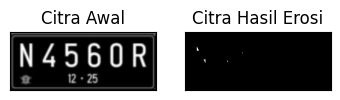

In [9]:
img_e= cv2.imread('/content/drive/MyDrive/PCVK/images/platnomor.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

## **Tophat**

In [11]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


## **Skeleton**

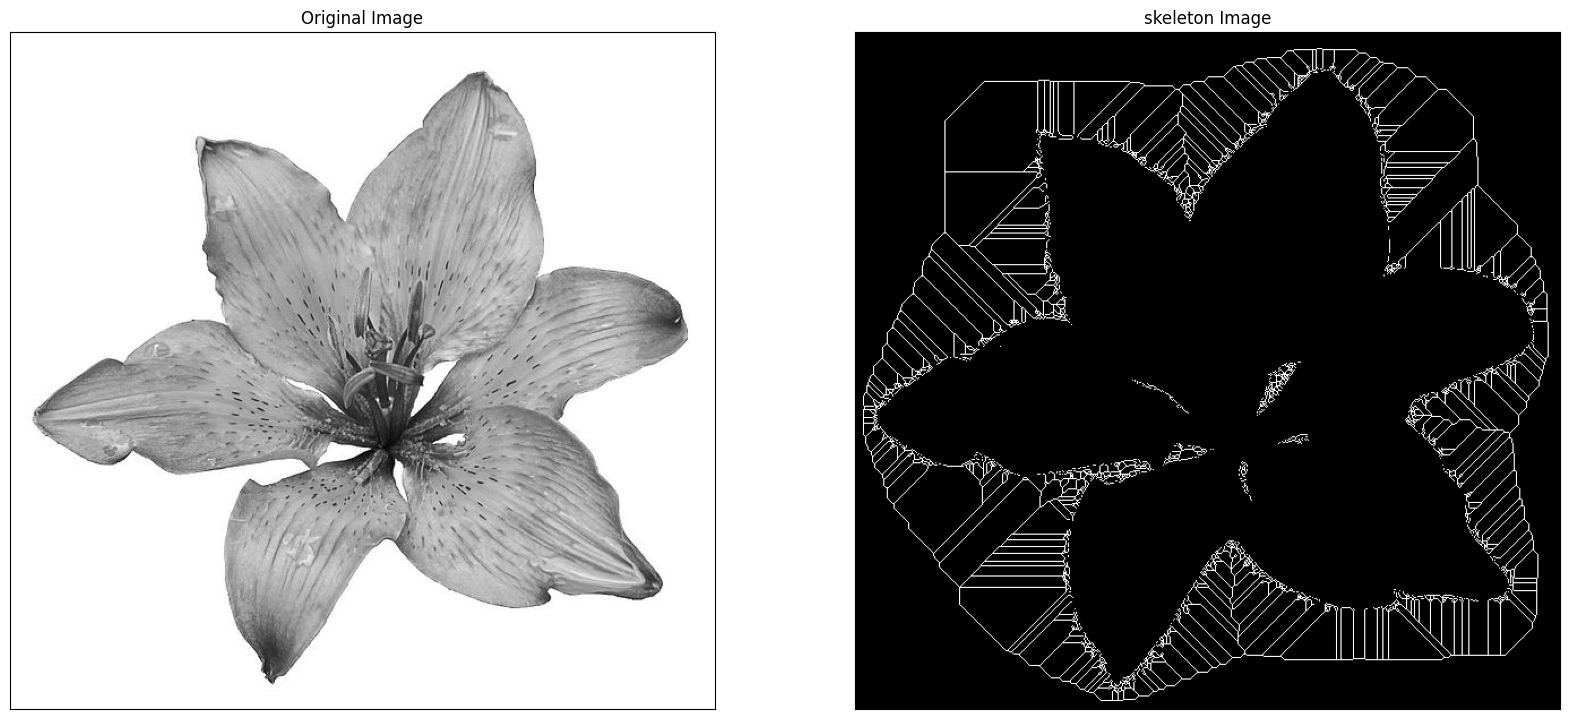

In [12]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/PCVK/images/lily.jpg',0)
binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()

## **Skeleton Inverse**

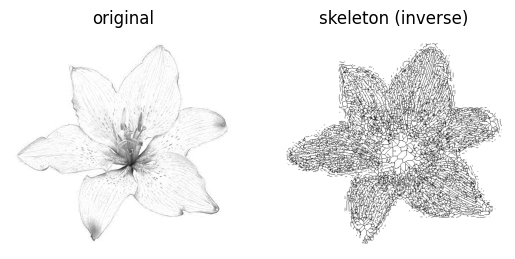

In [13]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/PCVK/images/lily.jpg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()
# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

## **Thickening**

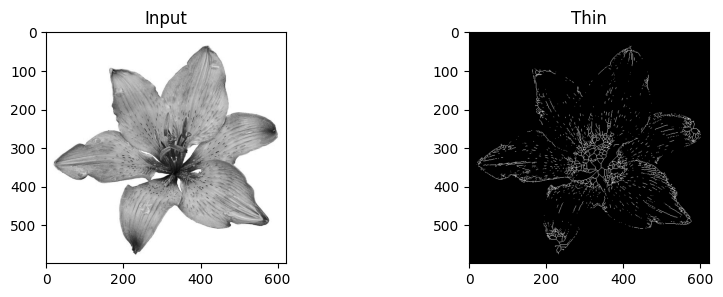

In [14]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

# **Tugas**

In [15]:
def basic_dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

#Erosi Tanpa Library
def basic_erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

def opening_closing_dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

#Erosi Tanpa Library
def opening_closing_erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

#Dilasi Cross SED
def cross_3_dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  #SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

def cross_5_dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)

  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

#Dilasi Circular SED
def circular_dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

#Erosi Cross SE
def rectangle_erosi_citra(F,p,l):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

#Erosi Line Vertikal SE
def line_erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

## **Dilasi KTP**

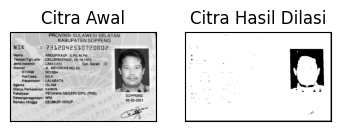

In [16]:
img_d= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = basic_dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

## **Erosi (KTP)**

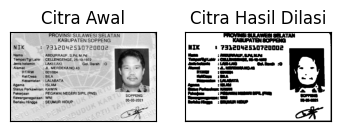

In [17]:
img_e= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0)
ret, thresh = cv2.threshold(img_e, 125, 200, cv2.THRESH_BINARY)
w=5
imgE = basic_erosi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

## **Opening (KTP)**

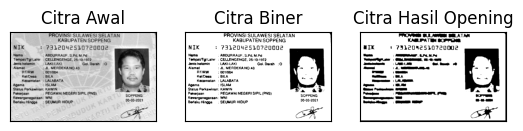

In [18]:
# Baca gambar dan lakukan thresholding
img_o = cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg', 0)
ret, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
# Ukuran kernel untuk operasi
k = 7
# Terapkan operasi opening (Erosi diikuti Dilasi)
imgO = opening_closing_dilasi_citra(opening_closing_erosi_citra(thresho, k), k)

# Tampilkan gambar asli dan hasil operasi opening
plt.subplot(131), plt.imshow(img_o, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresho, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(imgO, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()


## **Closing(KTP)**

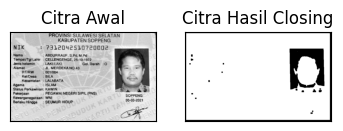

In [19]:
img_c= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0) #
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = opening_closing_erosi_citra(opening_closing_dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()


## **Dilasi Cross 3 x 3 (KTP)**

SED = Cross 3


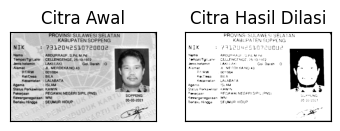

In [20]:
print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = cross_3_dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

## **Dilasi Cross 5 x 5 (KTP)**

SED = Cross 5


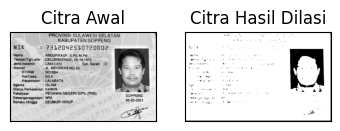

In [22]:
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = cross_5_dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

## **Dilasi Circular 3 x 3 (KTP)**

SED = Circle 3


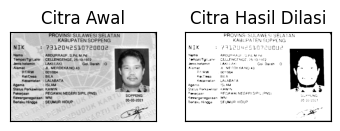

In [23]:
print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = circular_dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

## **Dilasi Circular 5 x 5 (KTP)**

SED = Circle 5


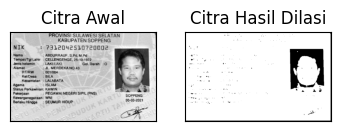

In [25]:
print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = circular_dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

## **Dilasi Rectangle 3 x 5 (KTP)**

SE = Rectangle 3x5


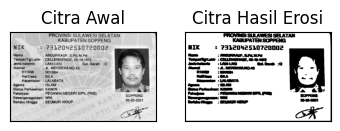

In [26]:
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = rectangle_erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

## **Dilasi Rectangle 5 x 7 (KTP)**

SE = Rectangle 5x7


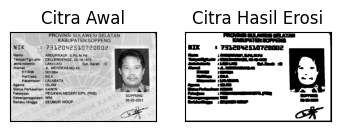

In [28]:
print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = rectangle_erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

## **Dilasi Line Vertikal 3 (KTP)**

SE = Line Vertikal 3


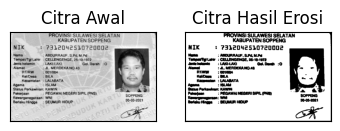

In [29]:
print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = line_erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

## **Dilasi Line Vertikal 5 (KTP)**

SE = Line Vertikal 5


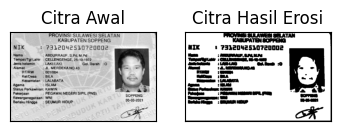

In [30]:
print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = line_erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

## **Tophat (KTP)**

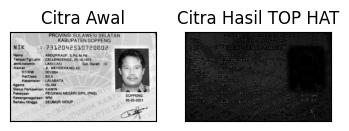

In [31]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

## **Blackhat(KTP)**

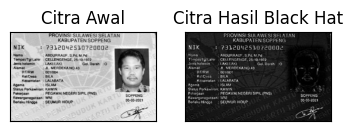

In [32]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

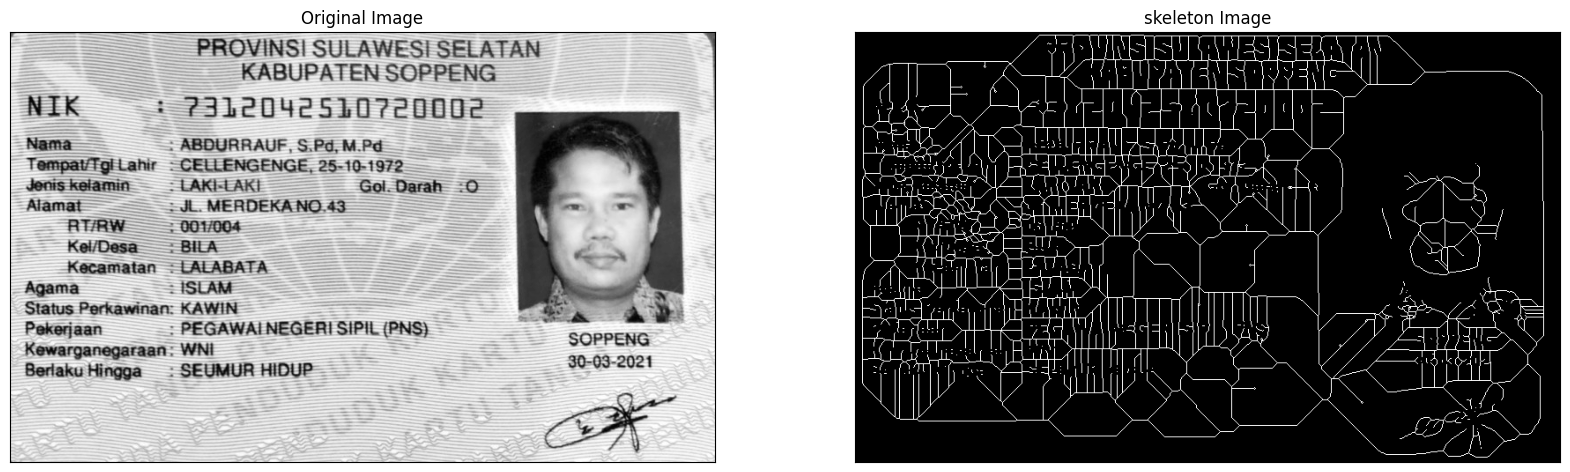

In [34]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg',0)
binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()


## **Skeleton Inverse (KTP)**

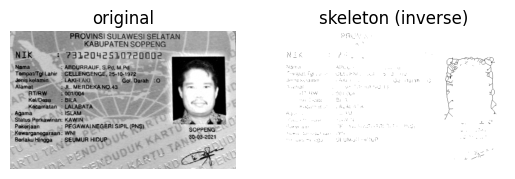

In [35]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()
# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

## **Thickening (KTP)**

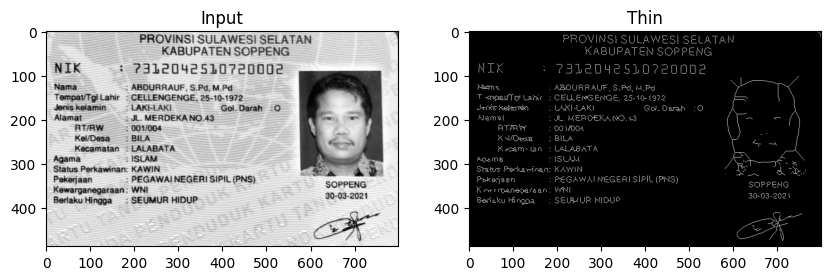

In [36]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()
